In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data('/temp/keras/boston_housing.npz')

In [3]:
print(train_data.shape)
print(test_data.shape)
print(train_data[0])

(404, 13)
(102, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [4]:
# 数据标准化 - 对每个特征做标准化
# 1. 数据数据的每个特征(列），减去特征平均值
# 2. 再除以标准差
# 这样得到特征平均值为0，标准差为1

# 训练数据集每列的均值
mean = train_data.mean(axis=0)

# 训练数据集减去均值后的矩阵
train_data -= mean

# 训练数据集每列的标准差
std = train_data.std(axis=0)

# 减去均值后的特征除以标准差
train_data /= std

print(train_data[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [5]:
test_data -= mean
test_data /= std

In [6]:
from keras import models
from keras import layers

# mse loss function - mean squared error
# mae metrc - mean absolute error, abs(targets - predictions)
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [7]:
# K折交叉验证 100轮

import numpy as np

k = 4
# 训练集的总长度除以k取整
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []

for i in range(k):
    
    print('processing fold #', i)
    
    # 取该折的验证数据集
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    # 取该折的实际训练数据集
    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([
        train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    # 模型构建，训练，评估
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
             epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    
    # 保存每折的分数
    all_scores.append(val_mae)

print(all_scores)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
[2.1428920054199674, 2.2554378580338885, 2.9350512004134677, 2.2923117917363007]
2.406423213900906


In [14]:
# K折交叉验证 500轮

num_epochs = 500
all_mae_histories = []

for i in range(k):
    
    print('processing fold #', i)
    
    # 取该折的验证数据集
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    # 取该折的实际训练数据集
    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([
        train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    # 模型构建，训练，评估
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        epochs=num_epochs, batch_size=1, verbose=0,
                        validation_data=(val_data, val_targets))
    
    # 保存每折的分数
    mae_history = history.history['val_mean_absolute_error']
    
    all_mae_histories.append(mae_history)
    
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [15]:
print(average_mae_history)

[4.6201131603505345, 3.4245971122590624, 3.0702399499345536, 2.973946214902519, 2.7869315879179704, 2.6696220683579397, 2.666780193253319, 2.5659407034958943, 2.5652296413289437, 2.5631840819179423, 2.5634870363934206, 2.498192664420251, 2.5124094096740874, 2.448511234604486, 2.6665057250768833, 2.5459618013684113, 2.5637568329820537, 2.4187174941053486, 2.492636214388479, 2.371197492769449, 2.297395701455598, 2.4264381462984748, 2.391018797855566, 2.4308522798047205, 2.3834508964330845, 2.540000024408397, 2.426649245885339, 2.2947147140408504, 2.3554271589411364, 2.3720016160813886, 2.3610698433205632, 2.4355803787118138, 2.4118754651286816, 2.2701782684515015, 2.3102769603823674, 2.5337284260457102, 2.3153146446341335, 2.2240501772059074, 2.3154728648686174, 2.44244650566932, 2.3202014488748985, 2.467369043000854, 2.2430211683311088, 2.3001655045122202, 2.3871917641989078, 2.262620759482431, 2.4518975243710055, 2.3155399147826845, 2.463411302849798, 2.4175211958365868, 2.380475607248

<function matplotlib.pyplot.show(*args, **kw)>

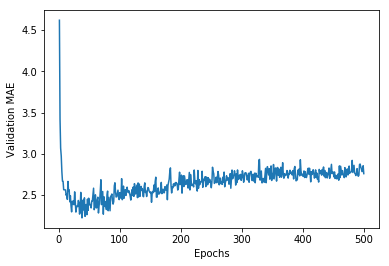

In [16]:
# 绘制验证分数
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show

In [17]:
# 去掉10个点，绘制验证分数平滑曲线
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

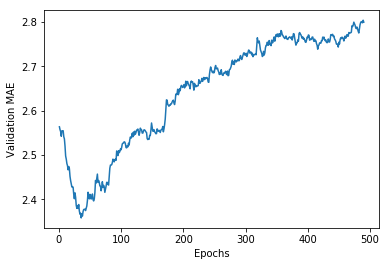

In [18]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [20]:
# 训练40轮

model2 = build_model()
model2.fit(train_data, train_targets, epochs=40, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model2.evaluate(test_data, test_targets)

print(test_mae_score)

102/102 [==============================] - 0s 2ms/step
3.0305253477657543
